<a href="https://colab.research.google.com/github/Obananob/Nigeria-House-Price-Prediction/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error, r2_score, mean_absolute_error


## Loading the Dataset

In [3]:
import pandas as pd
df = pd.read_csv("/content/nigeria_houses_data.csv")


## Exploratory Data Anaysis


In [4]:
df.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [5]:
df.tail()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0
24325,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,65000000.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24326 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24326 non-null  float64
 1   bathrooms      24326 non-null  float64
 2   toilets        24326 non-null  float64
 3   parking_space  24326 non-null  float64
 4   title          24326 non-null  object 
 5   town           24326 non-null  object 
 6   state          24326 non-null  object 
 7   price          24326 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.5+ MB


In [7]:
df.duplicated().sum()

np.int64(10438)

In [8]:
df.isnull().sum()

,0
bedrooms,0
bathrooms,0
toilets,0
parking_space,0
title,0
town,0
state,0
price,0


In [9]:
df[df.duplicated()]

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
28,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,7.500000e+07
29,5.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,2.700000e+08
57,5.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos,1.050000e+08
112,5.0,5.0,6.0,5.0,Detached Duplex,Ikoyi,Lagos,1.100000e+09
113,5.0,6.0,6.0,4.0,Detached Duplex,Lekki,Lagos,2.600000e+08
...,...,...,...,...,...,...,...,...
24316,5.0,5.0,6.0,5.0,Detached Duplex,Lekki,Lagos,3.200000e+08
24317,4.0,4.0,5.0,3.0,Terraced Duplexes,Lekki,Lagos,7.500000e+07
24318,4.0,5.0,5.0,4.0,Semi Detached Duplex,Lekki,Lagos,1.100000e+08
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,6.800000e+07


In [10]:
df.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24326.000000,24326.000000,24326.000000,24326.000000,2.432600e+04
mean,4.338814,4.600798,5.176355,4.041725,3.013802e+08
std,1.138497,1.163161,1.226253,1.399936,1.220403e+10
min,1.000000,1.000000,1.000000,1.000000,9.000000e+04
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,1.800000e+12


## Data Visualisation

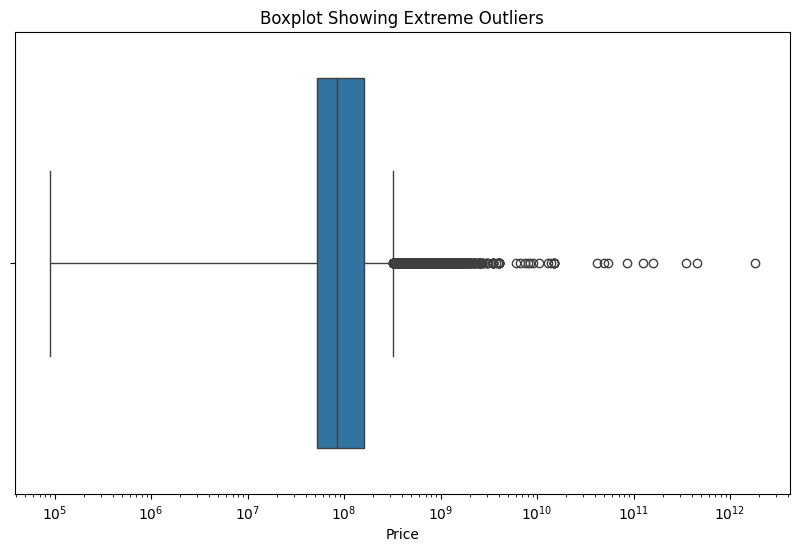

In [12]:


plt.figure(figsize=(10, 6))
sns.boxplot(x=df['price'])
plt.title("Boxplot Showing Extreme Outliers")
plt.xlabel("Price")
plt.xscale('log')
plt.show()

In [13]:
df_clean = df[(df['price'] >= 1_000_000) & (df['price'] <= 2_500_000_000)]

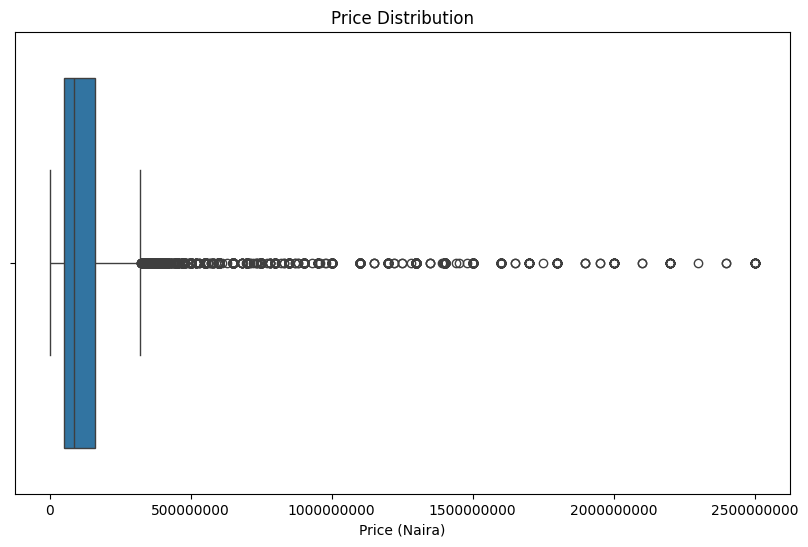

In [15]:

plt.figure(figsize=(10, 6))

sns.boxplot(x=df_clean['price'])
plt.title("Price Distribution")
plt.xlabel("Price (Naira)")


plt.ticklabel_format(style='plain', axis='x')
plt.show()

In [16]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24261 entries, 0 to 24325
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   bedrooms       24261 non-null  float64
 1   bathrooms      24261 non-null  float64
 2   toilets        24261 non-null  float64
 3   parking_space  24261 non-null  float64
 4   title          24261 non-null  object 
 5   town           24261 non-null  object 
 6   state          24261 non-null  object 
 7   price          24261 non-null  float64
dtypes: float64(5), object(3)
memory usage: 1.7+ MB


In [17]:
df_clean.describe()

,bedrooms,bathrooms,toilets,parking_space,price
count,24261.000000,24261.000000,24261.000000,24261.000000,2.426100e+04
mean,4.338733,4.600346,5.176415,4.041631,1.632118e+08
std,1.136995,1.162213,1.225265,1.399681,2.447812e+08
min,1.000000,1.000000,1.000000,1.000000,1.000000e+06
25%,4.000000,4.000000,5.000000,4.000000,5.200000e+07
50%,4.000000,5.000000,5.000000,4.000000,8.500000e+07
75%,5.000000,5.000000,6.000000,4.000000,1.600000e+08
max,9.000000,9.000000,9.000000,9.000000,2.500000e+09


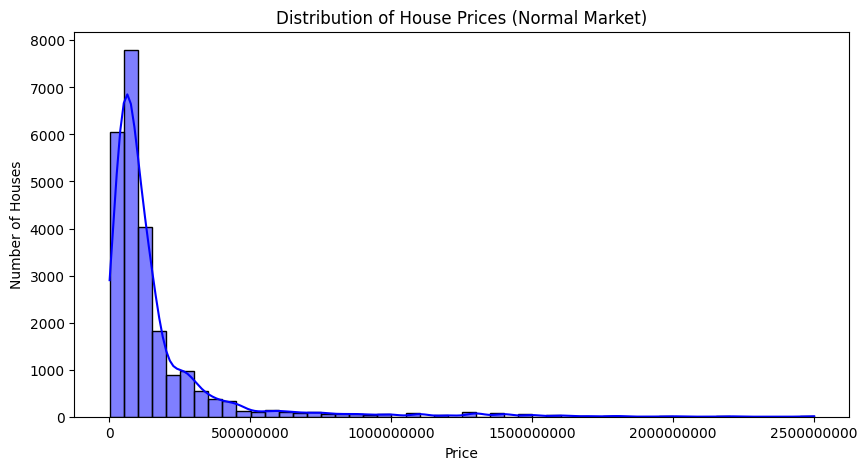

In [23]:
plt.figure(figsize=(10, 5))
sns.histplot(df_clean['price'], bins=50, kde=True, color='blue')
plt.title("Distribution of House Prices (Normal Market)")
plt.xlabel("Price")
plt.ylabel("Number of Houses")

plt.ticklabel_format(style='plain', axis='x')
plt.show()

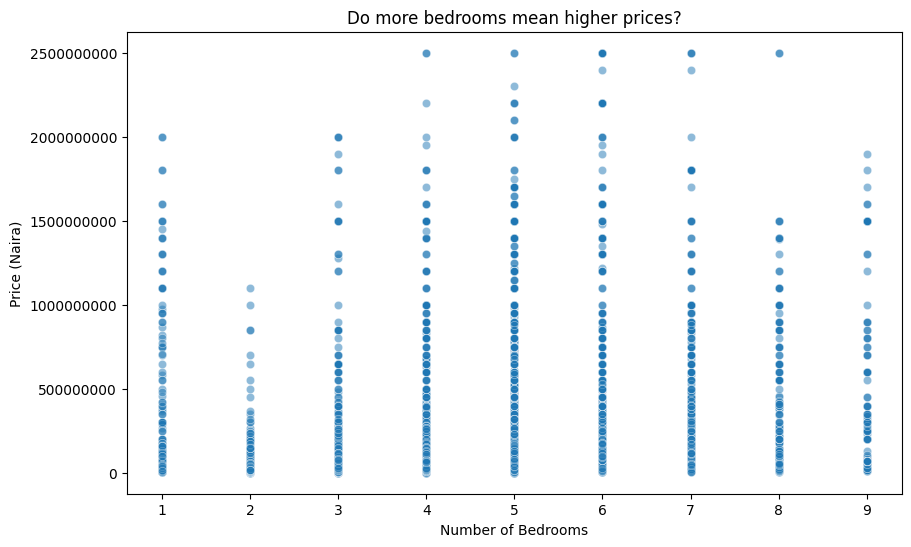

In [24]:

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_clean, x='bedrooms', y='price', alpha=0.5)

plt.title("Do more bedrooms mean higher prices?")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (Naira)")


plt.ticklabel_format(style='plain', axis='y')
plt.show()

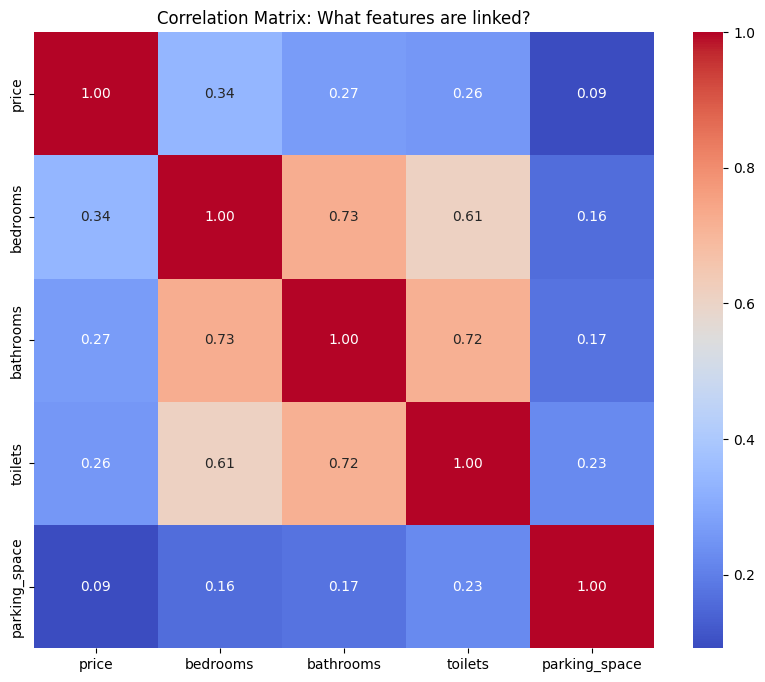

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the numeric columns for the correlation check
# (We exclude 'town' and 'state' text columns for this specific chart)
numeric_df = df_clean[['price', 'bedrooms', 'bathrooms', 'toilets', 'parking_space']]

plt.figure(figsize=(10, 8))

# Draw the Heatmap
# annot=True puts the numbers inside the boxes
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Matrix: What features are linked?")
plt.show()

## Splitting the Dataset

In [28]:
X = df_clean[['bedrooms', 'bathrooms', 'toilets', 'parking_space', 'title', 'town', 'state']]
y = df_clean['price']

In [29]:
X

,bedrooms,bathrooms,toilets,parking_space,title,town,state
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos
...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos


In [30]:
y

,price
0,450000000.0
1,800000000.0
2,120000000.0
3,40000000.0
4,75000000.0
...,...
24321,15000000.0
24322,25000000.0
24323,68000000.0
24324,78000000.0


In [31]:

# Encoding Text to Numbers
X = pd.get_dummies(X, drop_first=True)

In [34]:
X

,bedrooms,bathrooms,toilets,parking_space,title_Detached Bungalow,title_Detached Duplex,title_Semi Detached Bungalow,title_Semi Detached Duplex,title_Terraced Bungalow,title_Terraced Duplexes,...,state_Kogi,state_Kwara,state_Lagos,state_Nasarawa,state_Niger,state_Ogun,state_Osun,state_Oyo,state_Plateau,state_Rivers
0,6.0,5.0,5.0,4.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,4.0,5.0,5.0,4.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,4.0,5.0,5.0,4.0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,4.0,4.0,5.0,6.0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4,4.0,4.0,5.0,2.0,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
24322,4.0,5.0,5.0,4.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
24323,4.0,5.0,5.0,4.0,False,True,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
24324,3.0,4.0,4.0,3.0,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [37]:
X_train.shape

(19408, 220)

In [39]:
X_test.shape

(4853, 220)

In [40]:
y_train.shape

(19408,)

In [41]:
y_test.shape

(4853,)

## Training The Model
- Using Random forest Regressor model

In [42]:
RFR_model = RandomForestRegressor(n_estimators = 100)

In [43]:
RFR_model.fit(X_train, y_train)

RandomForestRegressor()

In [45]:
RFR_predictions = RFR_model.predict(X_test)

In [49]:

rfr_mae = mean_absolute_error(y_test, RFR_predictions)
rfr_mse = mean_squared_error(y_test, RFR_predictions)
rfr_rmse = root_mean_squared_error(y_test, RFR_predictions) # Root Mean Squared Error (easier to read than MSE)
rfr_r2 = r2_score(y_test, RFR_predictions)


print("--------------------------------------")
print("Model Evaluation Report")
print("--------------------------------------")
print(f"R2 Score (Accuracy): {rfr_r2:.2f}")
print(f"MAE (Average Error): ₦{rfr_mae:,.2f}")
print(f"RMSE (Root Mean Sq): ₦{rfr_rmse:,.2f}")
print("--------------------------------------")

--------------------------------------
Model Evaluation Report
--------------------------------------
R2 Score (Accuracy): 0.57
MAE (Average Error): ₦69,925,869.00
RMSE (Root Mean Sq): ₦157,299,953.96
--------------------------------------


## Using Gradient boosting Regression Model

In [50]:
from sklearn.ensemble import GradientBoostingRegressor

grad_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
grad_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [51]:
grad_predictions = grad_model.predict(X_test)

In [53]:

grad_mae = mean_absolute_error(y_test, grad_predictions)
grad_mse = mean_squared_error(y_test, grad_predictions)
grad_rmse = root_mean_squared_error(y_test, grad_predictions) # Root Mean Squared Error (easier to read than MSE)
grad_r2 = r2_score(y_test, grad_predictions)

print("--------------------------------------")
print(" Model Evaluation Report")
print("--------------------------------------")
print(f"R2 Score: {grad_r2:.2f}")
print(f"MAE: ₦{grad_mae:,.2f}")
print(f"RMSE: ₦{grad_rmse:,.2f}")
print(f"MSE: ₦{grad_mse:,.2f}")
print("--------------------------------------")

--------------------------------------
 Model Evaluation Report
--------------------------------------
R2 Score: 0.60
MAE: ₦71,678,363.59
RMSE: ₦150,521,957.61
MSE: ₦22,656,859,722,213,800.00
--------------------------------------


## Using XGBOOST

In [54]:
from xgboost import XGBRegressor

In [55]:
XGB = XGBRegressor(n_estimators=100, random_state=42)
XGB.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [56]:
xgb_predictions = XGB.predict(X_test)

In [57]:

mae = mean_absolute_error(y_test, xgb_predictions)
mse = mean_squared_error(y_test, xgb_predictions)
rmse = root_mean_squared_error(y_test, xgb_predictions) # Root Mean Squared Error (easier to read than MSE)
r2 = r2_score(y_test, xgb_predictions)


print("--------------------------------------")
print(" Model Evaluation Report")
print("--------------------------------------")
print(f"R2 Score (Accuracy): {r2:.2f}")
print(f"MAE (Average Error): ₦{mae:,.2f}")
print(f"RMSE (Root Mean Sq): ₦{rmse:,.2f}")
print("--------------------------------------")

--------------------------------------
 Model Evaluation Report
--------------------------------------
R2 Score (Accuracy): 0.59
MAE (Average Error): ₦69,333,736.45
RMSE (Root Mean Sq): ₦153,024,744.60
--------------------------------------


## Accuracy Check

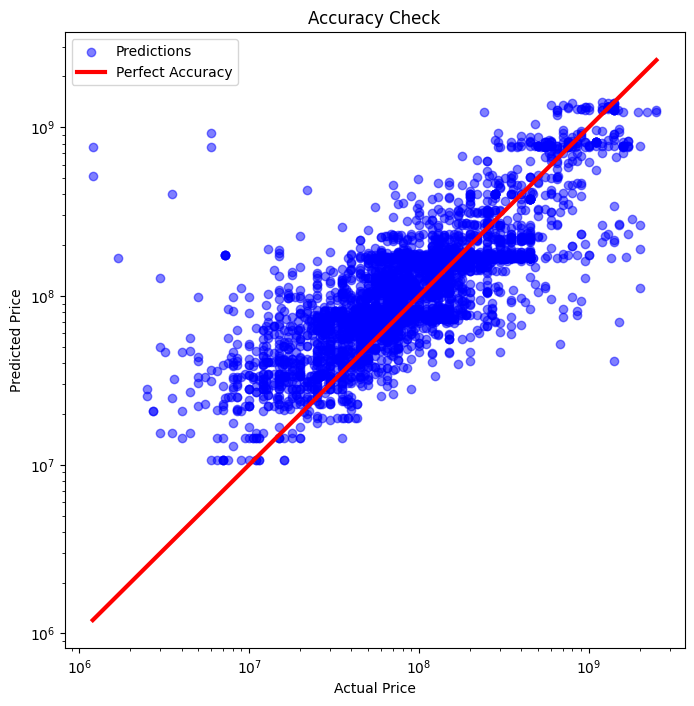

In [63]:

plt.figure(figsize=(8, 8))
plt.scatter(y_test, grad_predictions, alpha=0.5, color='blue', label='Predictions')


p1 = max(max(grad_predictions), max(y_test))
p2 = min(min(grad_predictions), min(y_test))
plt.plot([p1, p2], [p1, p2], 'r-', linewidth=3, label='Perfect Accuracy')

plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Accuracy Check')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.show()

/tmp/ipython-input-281013899.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


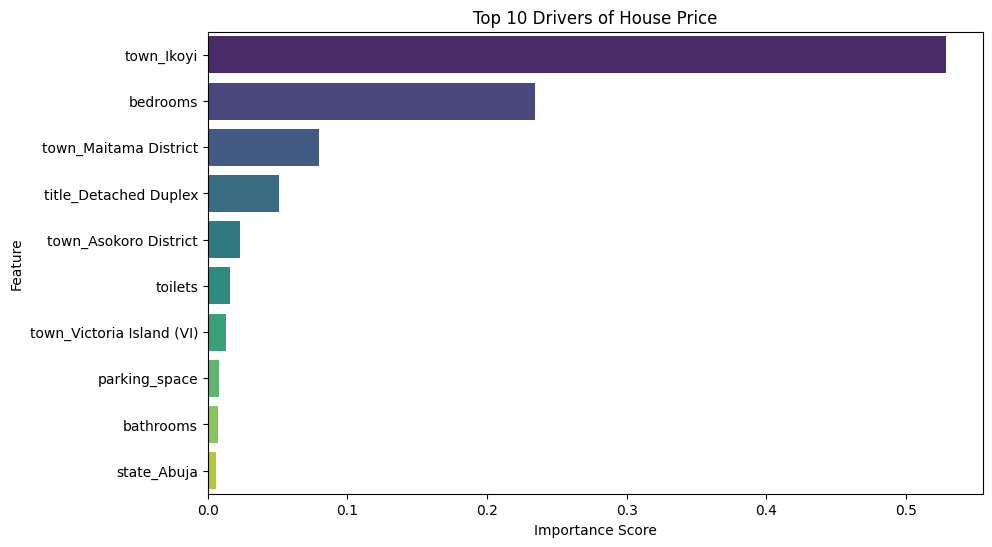

In [65]:

importance = grad_model.feature_importances_
feature_names = X.columns


fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(10)


plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title("Top 10 Drivers of House Price")
plt.xlabel("Importance Score")
plt.show()

## Saving the best Model

In [58]:
import joblib
joblib.dump(grad_model, "House_price.pkl")
print("Model Saved")

Model Saved


In [59]:
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

['model_columns.pkl']

## Streamlit

In [66]:

%%writefile requirements.txt
streamlit
pandas
scikit-learn
joblib
numpy
matplotlib
seaborn

Writing requirements.txt


In [60]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib


model = joblib.load('/content/House_price.pkl')
model_columns = joblib.load('/content/model_columns.pkl')


df = pd.read_csv('/content/nigeria_houses_data.csv')


st.set_page_config(page_title="Naija House Predictor", layout="centered")
st.title(" Nigerian House Price Predictor")
st.caption("Powered by GB")


st.sidebar.header("House Details")


bedrooms = st.sidebar.slider("Bedrooms", 1, 9, 4)
bathrooms = st.sidebar.slider("Bathrooms", 1, 9, 4)
toilets = st.sidebar.slider("Toilets", 1, 9, 5)
parking_space = st.sidebar.slider("Parking Space", 1, 9, 4)



states = sorted(df['state'].unique())
selected_state = st.selectbox("State", states)


towns_in_state = sorted(df[df['state'] == selected_state]['town'].unique())
selected_town = st.selectbox("Town", towns_in_state)

types = sorted(df['title'].unique())
selected_title = st.selectbox("House Type", types)


if st.button("Predict Price", type="primary"):

    user_input = pd.DataFrame({
        'bedrooms': [bedrooms],
        'bathrooms': [bathrooms],
        'toilets': [toilets],
        'parking_space': [parking_space],
        'title': [selected_title],
        'town': [selected_town],
        'state': [selected_state]
    })



    user_input_encoded = pd.get_dummies(user_input)


    if 'model_columns' not in locals():
        # This is a temporary placeholder. In a real app, model_columns should be saved with the model.
        # Or, the model should be trained with all possible dummy variables, and then new data needs to align.
        # For this exercise, I'll use the columns from X_train as a proxy.
        model_columns = pd.get_dummies(df.drop('price', axis=1), columns=['title', 'town', 'state'], drop_first=True).columns

    final_input = user_input_encoded.reindex(columns=model_columns, fill_value=0)


    prediction = model.predict(final_input)[0]


    st.markdown("---")
    st.success(f"###  Estimated Value: ₦{prediction:,.2f}")


    st.info(f"Market Estimate for a {bedrooms}-bedroom {selected_title} in {selected_town}, {selected_state}.")

Writing app.py


# Running Streamlit via Cloudflare

In [68]:

import time
import os
import re

print(" Installing Streamlit... (Ignore the red text)")
!pip install streamlit -q
!wget -q -O cloudflared https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64
!chmod +x cloudflared

print(" Starting App in background...")

get_ipython().system_raw('streamlit run app.py &')


get_ipython().system_raw('./cloudflared tunnel --url http://localhost:8501 > tunnel_log.txt 2>&1 &')

print(" Searching for the link... (Wait 10 seconds)")

link_found = False
for i in range(15):
    time.sleep(2)
    if os.path.exists('tunnel_log.txt'):
        with open('tunnel_log.txt', 'r') as f:
            content = f.read()

            match = re.search(r'https://[\w-]+\.trycloudflare\.com', content)
            if match:

                print(f" {match.group(0)}")

                link_found = True
                break

if not link_found:
    print(" Could not auto-detect link. Printing raw logs below:")
    print(open('tunnel_log.txt').read())

 Installing Streamlit... (Ignore the red text)
cloudflared: Text file busy
 Starting App in background...
 Searching for the link... (Wait 10 seconds)
 https://cant-arthur-infections-hands.trycloudflare.com
